In [0]:
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt

In [0]:
bs = 128

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

trainloader = DataLoader(trainset, batch_size=bs, shuffle=True)
testloader = DataLoader(testset, batch_size=bs)

In [0]:
classes = list(range(10))
classes

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [0]:
images, labels = next(iter(trainloader))

In [0]:
images.size(0)

128

0, 5, 0, 2, 9, 7, 3, 4, 2, 5, 8, 9, 4, 3, 1, 9, 9, 9, 1, 9, 9, 5, 4, 1, 2, 9, 9, 7, 3, 0, 3, 3


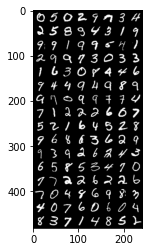

In [0]:
def imshow(img):
  img = img.numpy()
  img = np.transpose(img, (1, 2, 0))
  plt.imshow(img)

imshow(torchvision.utils.make_grid(images))
print(', '.join(str(classes[labels[i]]) for i in range(32)))

In [0]:
class Lenet(nn.Module):
  def __init__(self):
    super(Lenet, self).__init__()
    self.cnn_model = nn.Sequential(
        nn.Conv2d(1, 6, 5),
        nn.Tanh(),
        nn.AvgPool2d(2, stride=2),
        nn.Conv2d(6, 16, 5),
        nn.Tanh(),
        nn.AvgPool2d(2, stride=2)
    )

    self.fcn_model = nn.Sequential(
        nn.Linear(256, 120),
        nn.Tanh(),
        nn.Linear(120, 84),
        nn.Tanh(),
        nn.Linear(84, 10)
    )

  def forward(self, x):
    #print(inputs.shape)
    x = self.cnn_model(x)
    #print(x.shape)
    x = x.view(x.size(0), -1)
    #print(x.shape)
    out = self.fcn_model(x)

    return out

In [0]:
net = Lenet()

In [0]:
def evaluation(dataloader):
  total, correct = 0, 0

  for data in dataloader:
    inputs, labels = data
    outputs = net(inputs)

    _, pred = torch.max(outputs, 1)
    
    total += labels.size(0)
    correct += (pred == labels).sum().item()

    return (correct/total * 100)

In [0]:
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

In [0]:
epochs = 10

for epoch in range(epochs):
  for data in trainloader:
    inputs, labels = data

    opt.zero_grad()

    outputs = net(inputs)
    loss = loss_fn(outputs, labels)
    
    loss.backward()
    opt.step()

  print('Epoch %d/%d \t Train acc: %0.2f \t Test acc: %0.2f' % (epoch+1, epochs, evaluation(trainloader), evaluation(testloader)))

Epoch 1/10 	 Train acc: 96.88 	 Test acc: 100.00
Epoch 2/10 	 Train acc: 97.66 	 Test acc: 99.22
Epoch 3/10 	 Train acc: 99.22 	 Test acc: 100.00
Epoch 4/10 	 Train acc: 100.00 	 Test acc: 100.00
Epoch 5/10 	 Train acc: 100.00 	 Test acc: 99.22
Epoch 6/10 	 Train acc: 100.00 	 Test acc: 100.00
Epoch 7/10 	 Train acc: 99.22 	 Test acc: 99.22
Epoch 8/10 	 Train acc: 100.00 	 Test acc: 99.22
Epoch 9/10 	 Train acc: 100.00 	 Test acc: 99.22
Epoch 10/10 	 Train acc: 100.00 	 Test acc: 99.22
